## About the Pima Indians Diabetes Database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

##Variables in the dataset
**Pregnancies**- Number of times pregnant <br/>
**Glucose-** Plasma glucose concentration over 2 hours in an oral glucose tolerance test <br/>
**BloodPressure**- Diastolic blood pressure (mm Hg)<br/>
**SkinThickness**- Triceps skin fold thickness (mm)<br/>
**Insulin**- 2-Hour serum insulin (mu U/ml)<br/>
**BMI**- Body mass index (weight in kg/(height in m)^2)<br/>
**DiabetesPedigreeFunction**- Diabetes pedigree function is a function which scores likelihood of diabetes based on family history <br/>
**Age**- Age of the individuals, ll patients here are females at least 21 years old of Pima Indian heritage.<br/>
**Outcome**- Class variable (0 if non-diabetic, 1 if diabetic)



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("https://raw.githubusercontent.com/ashpsnair/Diabetes_EDA/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Finding general information about the dataset
print("Data shape="+ str(data.shape))
data.info()

Data shape=(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Look for any discrepancies
print("Null Values for this dataset")
print(data.isnull().sum())
print("Number of duplicated data= "+ str(data.duplicated().sum()))

Null Values for this dataset
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Number of duplicated data= 0


In [ ]:
# There's no data is missing

In [ ]:
#Description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Looking at the description summary - Some of the data are not satisfactory such as presence of value 0 for many variables such as glucose, BP etc.
#Handling 0 values in the data
remove=["Glucose","BMI","SkinThickness","BloodPressure","Age","Insulin"]

#creating a duplicate of data
new_data=data
for i in remove:
  new_data=new_data[new_data[i]!=0]



In [ ]:
#Description after data cleaning
print("No. of rows removed = "+ str(len(data)-len(new_data)))

No. of rows removed = 376


In [ ]:
#It is not advised to remove such large amount of data as it might result in misleading insights
#Therefore, it is suggested to replace 0 with NaN
modifs= ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age'] #variables to be modified
data[modifs] = data[modifs].replace(0,np.NaN)
#Looking at the null values now


In [ ]:
missing_values = (data.isnull().sum() / len(data) * 100).round(2)
print(missing_values)

Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64


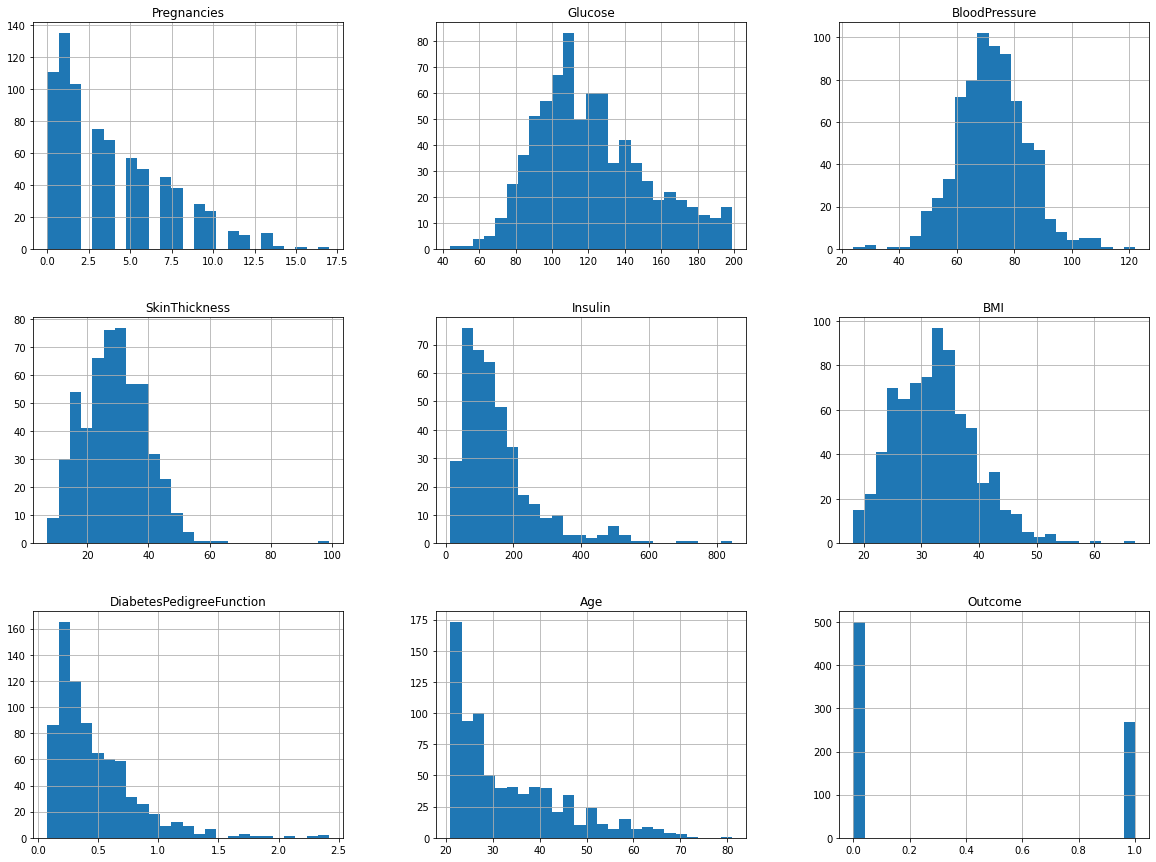

In [ ]:
data.hist(bins=25, figsize=(20, 15));

**Some of the observations from the data:** <br/>


1.   Glucose and Blood Pressure are normally distributed
2.   Skin Thickness,DiabetesPedigreeFunction and BMI is positvely skewed




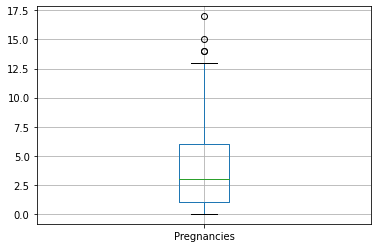

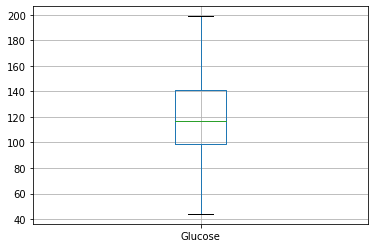

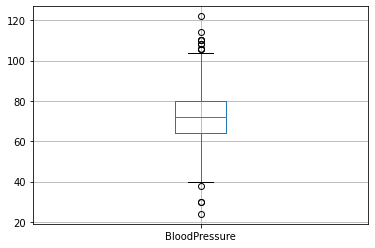

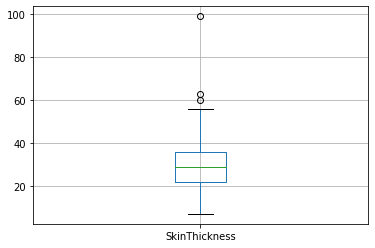

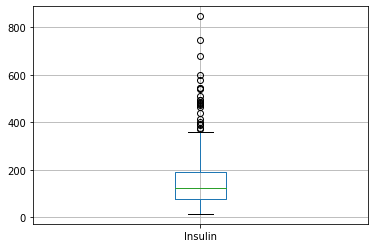

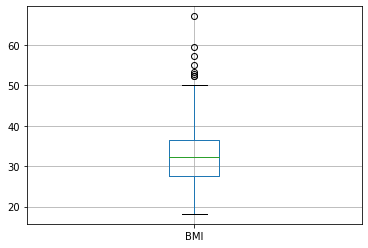

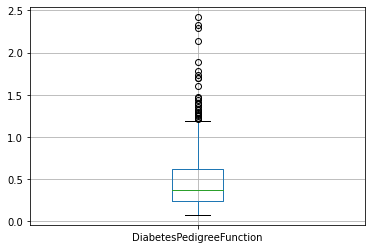

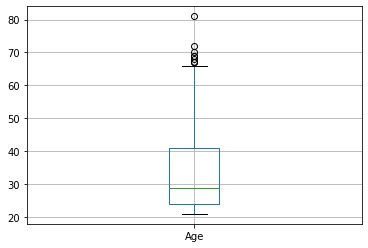

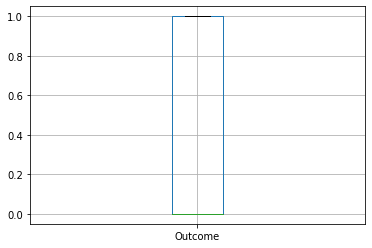

In [ ]:
for column in data:
    plt.figure()
    data.boxplot([column])

**Observations from boxplot**


1.  The max Pregnacies is 17 which is quite an outlier.
2.  Blood Pressure, SkinThickness and Age has very few outliers
3. Insulin and DiabetesPedigreeFunction has large number of outliers



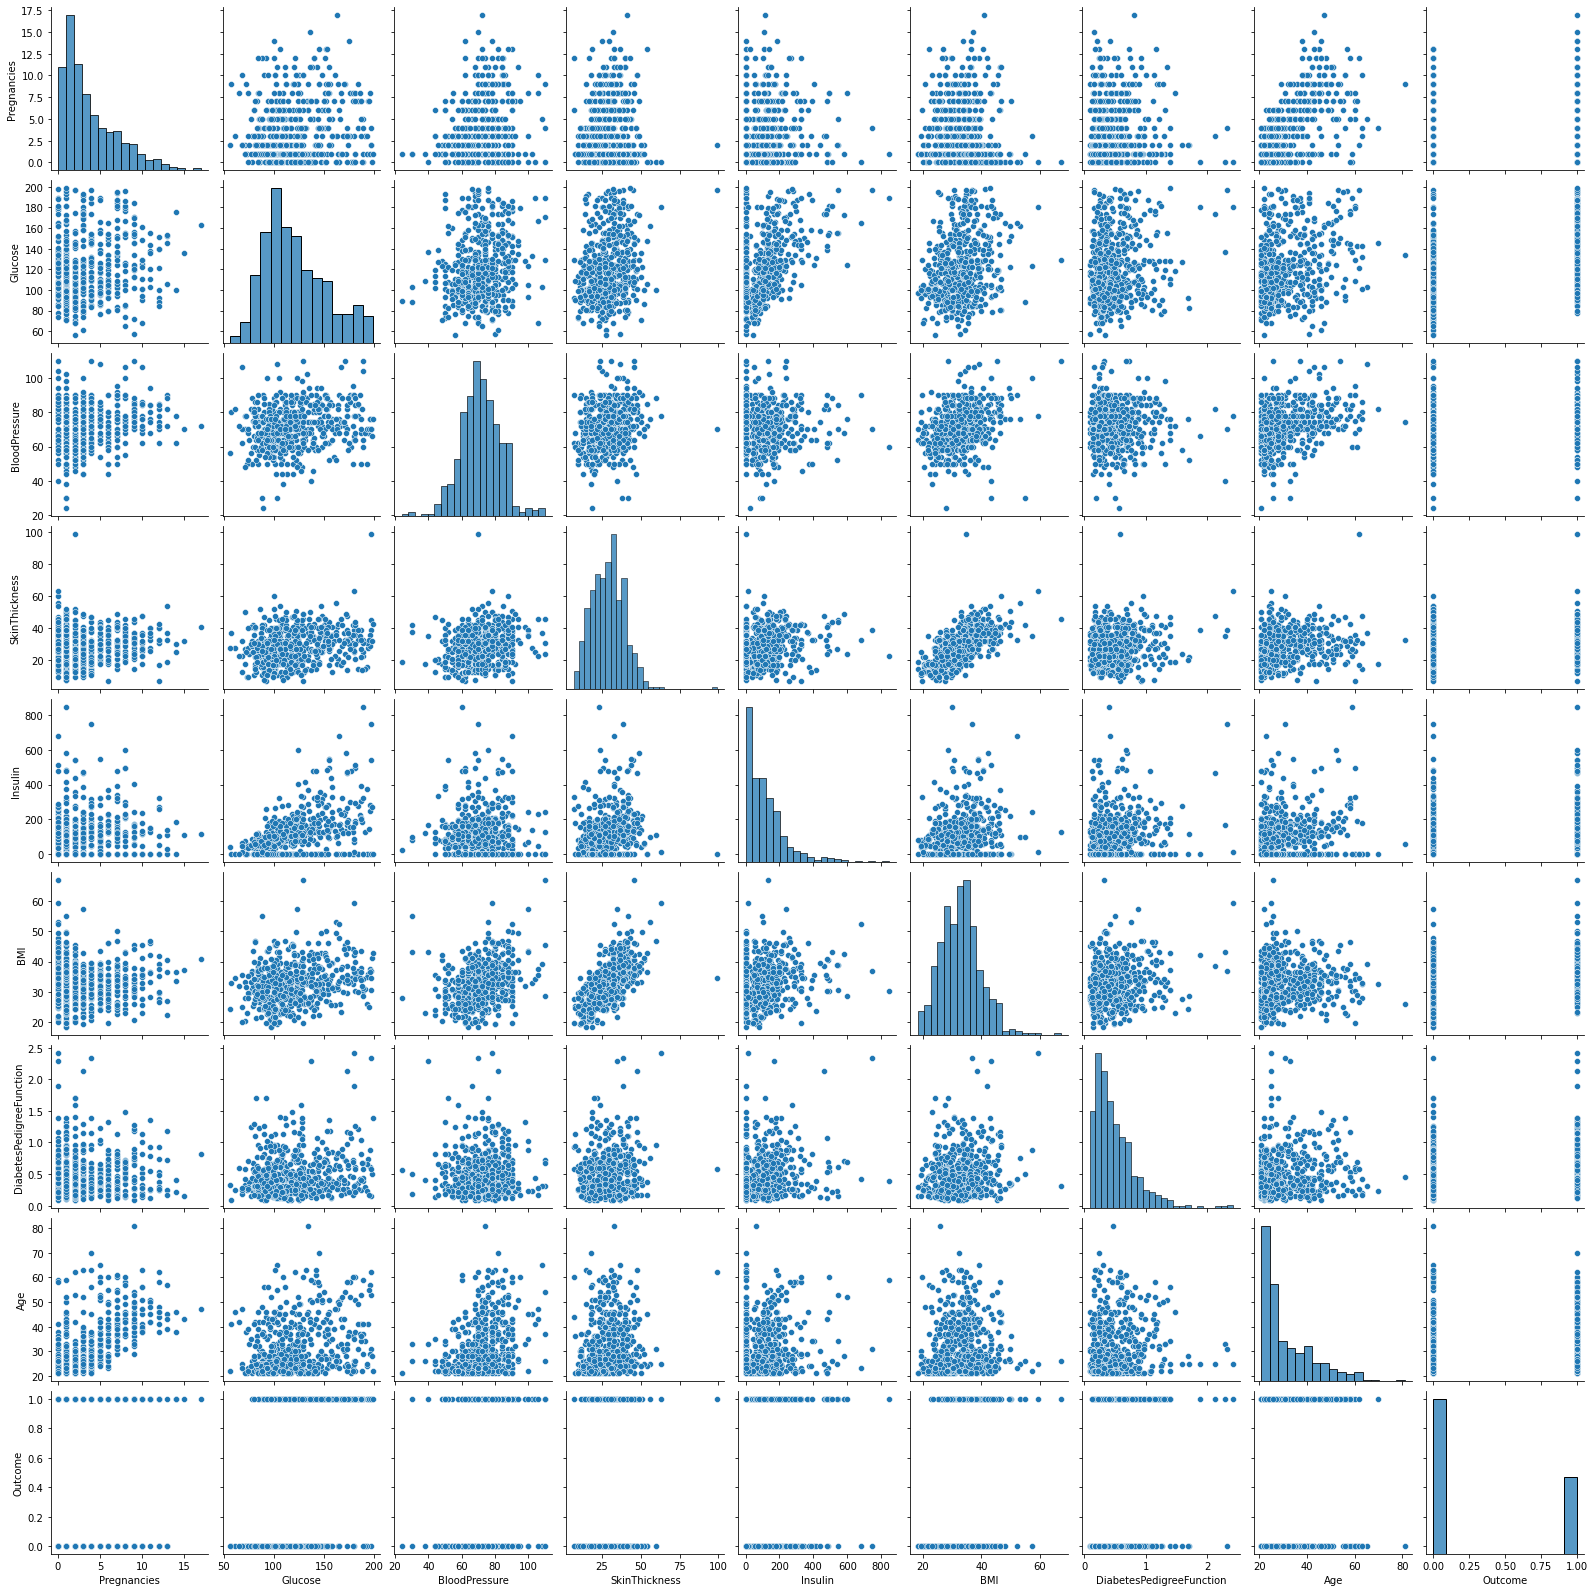

In [ ]:
#Bivariate Analysis 
#Visualization
sns.pairplot(data=data)


In [ ]:
#NOTE: Both of these coefficients cannot capture any other kind of non-linear relationships. 
#Thus, if a scatterplot indicates a relationship that cannot be expressed by a linear or monotonic function, 
#then both of these coefficients must not be used to determine the strength of the relationship between the variables.
#Correlation
#Now, if we feel that a scatterplot is visually indicating a “might be monotonic, might be linear” relationship, 
#our best bet would be to apply Spearman and not Pearson
corr=data.corr(method="spearman")
corr



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129547,0.194103,0.086734,0.127859,0.000279,-0.043242,0.607216,0.198689
Glucose,0.129547,1.000000,0.249415,0.229815,0.658813,0.227761,0.090596,0.283315,0.483364
BloodPressure,0.194103,0.249415,1.000000,0.248017,0.130463,0.299176,0.008511,0.370609,0.177227
SkinThickness,0.086734,0.229815,0.248017,1.000000,0.245188,0.685380,0.074979,0.231132,0.265397
Insulin,0.127859,0.658813,0.130463,0.245188,1.000000,0.303515,0.130262,0.267437,0.377300
BMI,0.000279,0.227761,0.299176,0.685380,0.303515,1.000000,0.136138,0.121119,0.309324
DiabetesPedigreeFunction,-0.043242,0.090596,0.008511,0.074979,0.130262,0.136138,1.000000,0.042909,0.175353
Age,0.607216,0.283315,0.370609,0.231132,0.267437,0.121119,0.042909,1.000000,0.309040
Outcome,0.198689,0.483364,0.177227,0.265397,0.377300,0.309324,0.175353,0.309040,1.000000


In [ ]:
#Some of the pairs who show some relationship are
factors=["Age","Pregnancies","BMI","SkinThickness","Glucose","Insulin","Outcome"]

# Creating a matrix and plotting the correlation matrix
data[factors].corr()


,Age,Pregnancies,BMI,SkinThickness,Glucose,Insulin,Outcome
Age,1.000000,0.544341,0.025841,0.166816,0.267136,0.220261,0.238356
Pregnancies,0.544341,1.000000,0.021719,0.100239,0.128135,0.082171,0.221898
BMI,0.025841,0.021719,1.000000,0.648214,0.232771,0.228050,0.313680
SkinThickness,0.166816,0.100239,0.648214,1.000000,0.228043,0.184888,0.259491
Glucose,0.267136,0.128135,0.232771,0.228043,1.000000,0.581186,0.494650
Insulin,0.220261,0.082171,0.228050,0.184888,0.581186,1.000000,0.303454
Outcome,0.238356,0.221898,0.313680,0.259491,0.494650,0.303454,1.000000


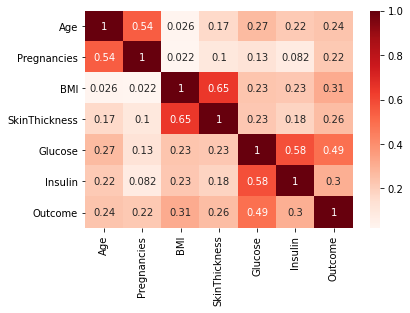

In [ ]:
# lotting the correlation matrix
sns.heatmap(data[factors].corr(), annot=True, cmap = 'Reds')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


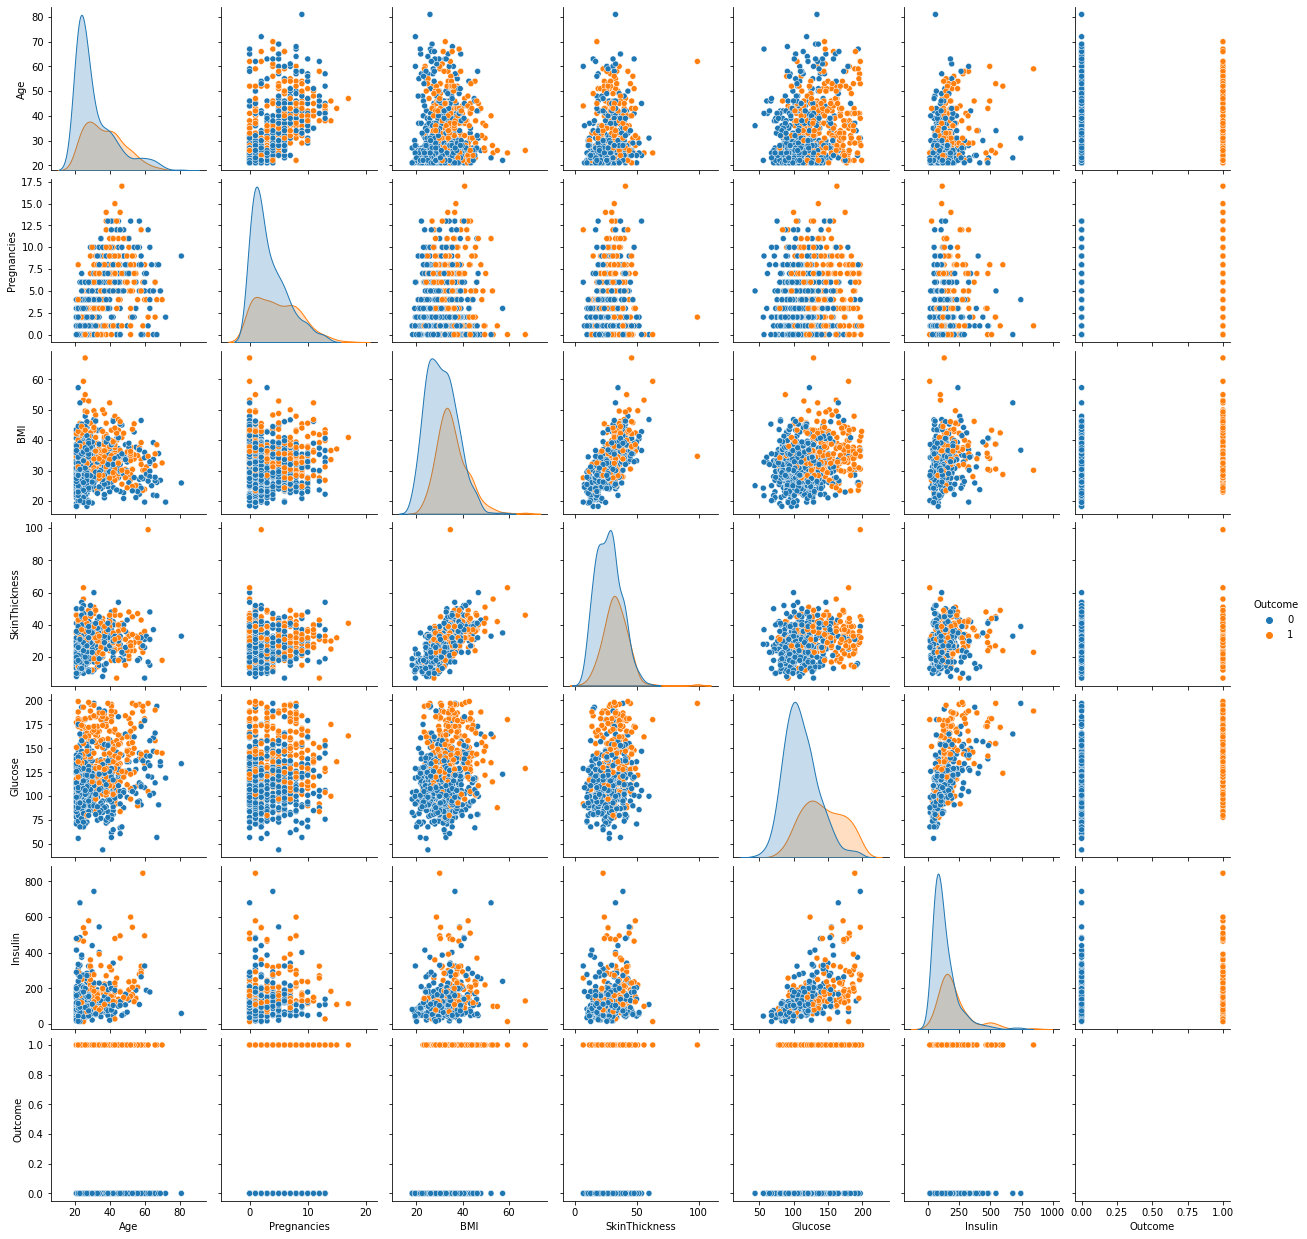

In [ ]:
sns.pairplot(data=data, vars=factors, hue="Outcome")